# PHY3 — Manipulation 8 : Cellules photovoltaïques  
_Notebook prêt pour le labo — 2025-11-09_

## Mode d'emploi

- Remplis les tableaux de mesures dans chaque section (les DataFrames) puis exécute les cellules en dessous.
- Tous les tracés utilisent **matplotlib** (pas de seaborn), un graphique par figure.
- Les fonctions calculent automatiquement : I(U), P=UI, P_MPP, FF, eta, R_int, etc.
- Les variables importantes sont regroupées au début de chaque section.

## 1) U_oc et I_sc en fonction de l'intensité et de la surface éclairée

**Objectif.** Mesurer puis comparer U_oc (tension en circuit ouvert) et I_sc (courant en court-circuit) :
- (a) quand on fait varier l'intensité lumineuse via le nombre d'ampoules actives,
- (b) quand on fait varier la surface active de la cellule (fraction de surface éclairée).

**Ce que tu dois entrer :**
- Le nombre d'ampoules (1 a 4 selon le set-up) et, pour chacune, les mesures de U_oc, I_sc.
- La fraction de surface éclairée (par ex. 0.0, 0.25, 0.5, 0.75) et, pour chacune, U_oc, I_sc.

**Ce que le code fait :**
- Traces U_oc et I_sc en fonction du nombre d'ampoules et de la fraction de surface.
- Ajustement lineaire simple de controle et affichage des parametres.

nb_ampoules,Uoc_V,Isc_A
1,4.930e-01,1.171e-02
2,5.200e-01,2.474e-02
3,5.290e-01,3.846e-02
4,5.360e-01,4.730e-02


fraction_surface,Uoc_V,Isc_A
0.000000,5.360e-01,4.730e-02
0.250000,5.330e-01,3.657e-02
0.500000,5.140e-01,2.077e-02
0.750000,4.880e-01,1.080e-02


Fit Uoc vs #ampoules: Uoc ≈ 0.0138·N + 0.4850   (R² = 0.894)
Fit Isc vs #ampoules: Isc ≈ 0.0120·N + 0.0004   (R² = 0.992)


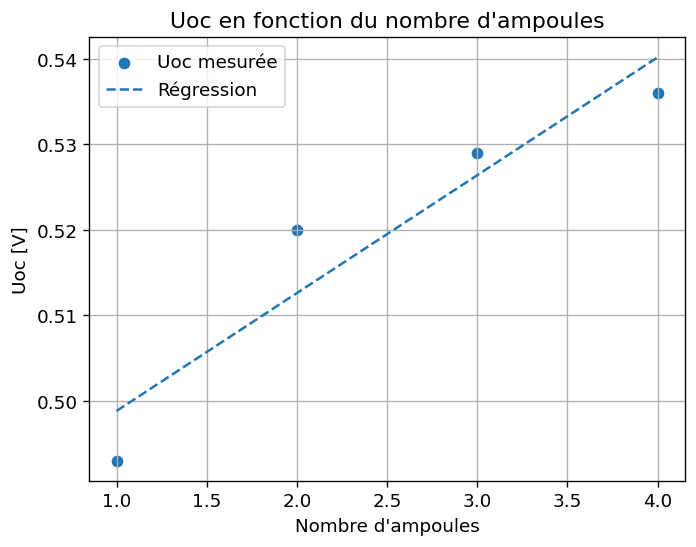

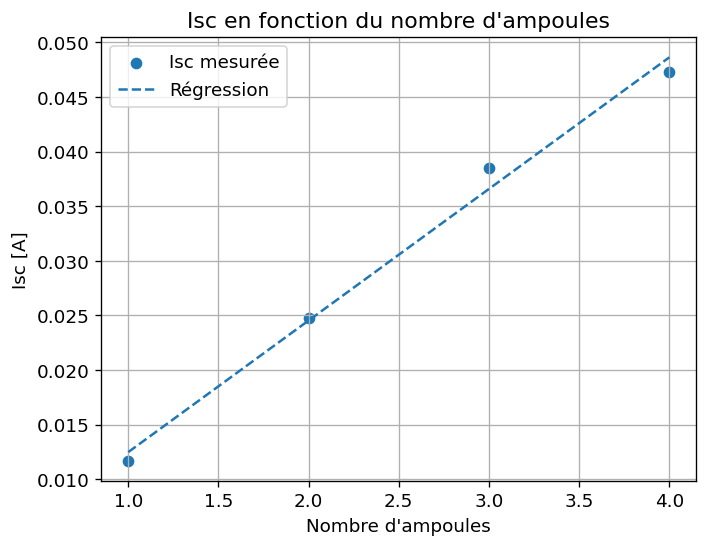

Fit Uoc vs surface: Uoc ≈ -0.0652·s + 0.5422   (R² = 0.907)
Fit Isc vs surface: Isc ≈ -0.0501·s + 0.0477   (R² = 0.992)


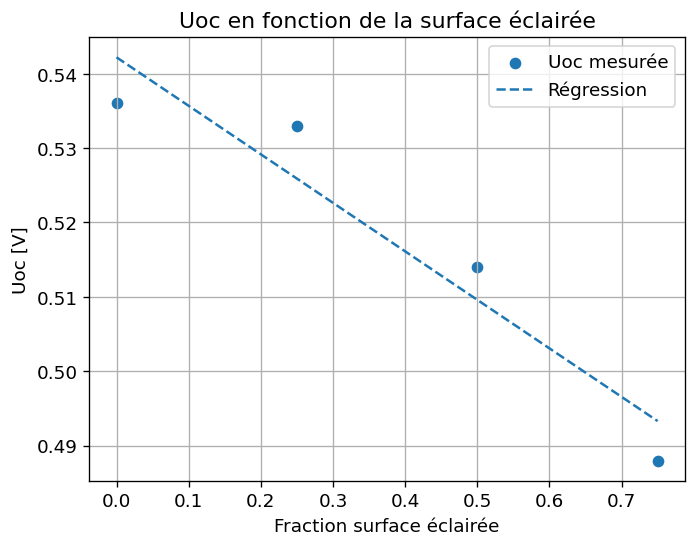

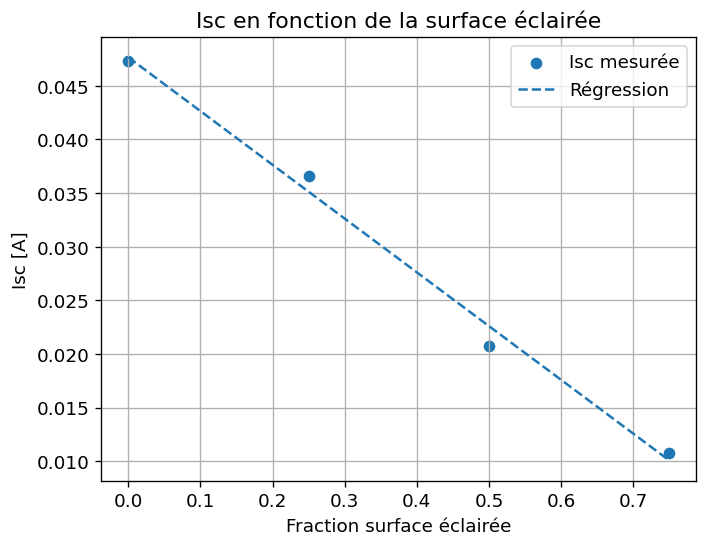

In [38]:
# --- Imports generaux ---
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- (a) Donnees: variation d'intensite via le nombre d'ampoules ---
data_lamps = pd.DataFrame({
    "nb_ampoules": [1, 2, 3, 4],
    "Uoc_V":       [0.493, 0.520, 0.529, 0.536],
    "Isc_A":       [0.01171, 0.02474, 0.03846, 0.0473],
})

# --- (b) Donnees: variation de surface eclairee ---
data_surface = pd.DataFrame({
    "fraction_surface": [0.0, 0.25, 0.5, 0.75],
    "Uoc_V":            [0.536, 0.533, 0.514, 0.488],
    "Isc_A":            [0.0473, 0.03657, 0.02077, 0.01080],
})
#pd.set_option("display.float_format", "{:.3e}".format)

display(
    data_lamps.style.hide(axis="index").format({
        "Uoc_V": "{:.3e}",
        "Isc_A": "{:.3e}"
    })
)
display(
    data_surface.style.hide(axis="index").format({
        "Uoc_V": "{:.3e}",
        "Isc_A": "{:.3e}"
    })
)
# --- Fonction de fit linéaire ---
def quick_linfit(x, y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    A = np.vstack([x, np.ones_like(x)]).T
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    ypred = a*x + b
    ss_res = np.sum((y - ypred)**2)
    ss_tot = np.sum((y - y.mean())**2)
    r2 = 1 - ss_res/ss_tot
    return a, b, r2

# ==========================================================
# 1) Uoc et Isc en fonction du nombre d'ampoules
# ==========================================================

# Fit
aU, bU, r2U = quick_linfit(data_lamps["nb_ampoules"], data_lamps["Uoc_V"])
aI, bI, r2I = quick_linfit(data_lamps["nb_ampoules"], data_lamps["Isc_A"])

print(f"Fit Uoc vs #ampoules: Uoc ≈ {aU:.4f}·N + {bU:.4f}   (R² = {r2U:.3f})")
print(f"Fit Isc vs #ampoules: Isc ≈ {aI:.4f}·N + {bI:.4f}   (R² = {r2I:.3f})")

# --- Scatter + droite de régression ---
x = np.array(data_lamps["nb_ampoules"], dtype=float)
xp = np.linspace(min(x), max(x), 100)

plt.figure()
plt.scatter(x, data_lamps["Uoc_V"], marker='o', label="Uoc mesurée")
plt.plot(xp, aU*xp + bU, linestyle='--', label="Régression")
plt.xlabel("Nombre d'ampoules")
plt.ylabel("Uoc [V]")
plt.title("Uoc en fonction du nombre d'ampoules")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.scatter(x, data_lamps["Isc_A"], marker='o', label="Isc mesurée")
plt.plot(xp, aI*xp + bI, linestyle='--', label="Régression")
plt.xlabel("Nombre d'ampoules")
plt.ylabel("Isc [A]")
plt.title("Isc en fonction du nombre d'ampoules")
plt.grid(True)
plt.legend()
plt.show()

# ==========================================================
# 2) Uoc et Isc en fonction de la surface éclairée
# ==========================================================

aUs, bUs, r2Us = quick_linfit(data_surface["fraction_surface"], data_surface["Uoc_V"])
aIs, bIs, r2Is = quick_linfit(data_surface["fraction_surface"], data_surface["Isc_A"])

print(f"Fit Uoc vs surface: Uoc ≈ {aUs:.4f}·s + {bUs:.4f}   (R² = {r2Us:.3f})")
print(f"Fit Isc vs surface: Isc ≈ {aIs:.4f}·s + {bIs:.4f}   (R² = {r2Is:.3f})")

xs = np.array(data_surface["fraction_surface"], dtype=float)
xsp = np.linspace(min(xs), max(xs), 100)

plt.figure()
plt.scatter(xs, data_surface["Uoc_V"], marker='o', label="Uoc mesurée")
plt.plot(xsp, aUs*xsp + bUs, linestyle='--', label="Régression")
plt.xlabel("Fraction surface éclairée")
plt.ylabel("Uoc [V]")
plt.title("Uoc en fonction de la surface éclairée")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.scatter(xs, data_surface["Isc_A"], marker='o', label="Isc mesurée")
plt.plot(xsp, aIs*xsp + bIs, linestyle='--', label="Régression")
plt.xlabel("Fraction surface éclairée")
plt.ylabel("Isc [A]")
plt.title("Isc en fonction de la surface éclairée")
plt.grid(True)
plt.legend()
plt.show()


## 2) Resistance interne R_int de la cellule

Principe (loi des mailles): U_charge + U_oc - U_int = 0, donc U_int = U_oc - U_charge et R_int = (U_oc - U_charge)/I.

Ce que tu dois entrer :
- U_oc (mesure sans charge dans les memes conditions d'eclairement).
- Pour chaque charge R: la tension U_charge aux bornes de la charge et le courant I.

Ce que le code fait :
- Calcule R_int par point et trace R_int en fonction de R.
- Verifie la loi des mailles via un residu numerique simple.

,R_load_ohm,Ucharge_V,I_A
0,1.000e+02,5.210e-01,5.240e-03
1,5.000e+01,5.076e-01,1.014e-02
2,3.330e+01,4.950e-01,1.488e-02


,R_load_ohm,Ucharge_V,I_A,Uint_V,Rint_ohm,kirchhoff_residual_V
0,1.000e+02,5.210e-01,5.240e-03,1.498e-02,2.859e+00,0.000e+00
1,5.000e+01,5.076e-01,1.014e-02,2.836e-02,2.797e+00,0.000e+00
2,3.330e+01,4.950e-01,1.488e-02,4.100e-02,2.755e+00,0.000e+00


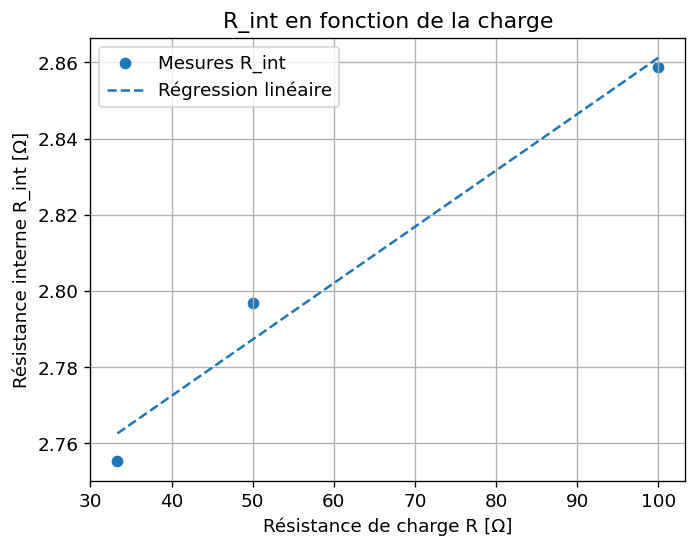

Forme de la régression : R_int ≈ 0.0015·R_load + 2.7133
R_int moyen (Ohm)    : 2.803666383833264
R_int médiane (Ohm)  : 2.7968441814595715
Ecart-type (Ohm)     : 0.04248854596874334


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Donnée : tension à vide mesurée
Uoc_V = 0.536

# Tableau des mesures
data_rint = pd.DataFrame({
    "R_load_ohm":  [100, 50, 33.3],
    "Ucharge_V":   [0.52102, 0.50764, 0.495],
    "I_A":         [0.00524, 0.01014, 0.01488],
})

display(data_rint)

# ---- Calculs ----
def compute_rint(df, Uoc):
    df = df.copy()
    df["Uint_V"] = Uoc - df["Ucharge_V"]
    df["Rint_ohm"] = df["Uint_V"] / df["I_A"]
    df["kirchhoff_residual_V"] = df["Ucharge_V"] + df["Uint_V"] - Uoc  # doit être ≈ 0
    return df

res_rint = compute_rint(data_rint, Uoc_V)
display(res_rint)

# ---- Régression linéaire ----
x = res_rint["R_load_ohm"].values
y = res_rint["Rint_ohm"].values

A = np.vstack([x, np.ones_like(x)]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]     # y ≈ a*x + b
ypred = a*x + b

# ---- Tracé (sans relier les points) ----
plt.figure()
plt.scatter(x, y, marker='o', label="Mesures R_int")     # points seuls
plt.plot(x, ypred, linestyle='--', label="Régression linéaire")  # droite uniquement
plt.xlabel("Résistance de charge R [Ω]")
plt.ylabel("Résistance interne R_int [Ω]")
plt.title("R_int en fonction de la charge")
plt.grid(True)
plt.legend()
plt.show()

# ---- Résumé numérique ----
print(f"Forme de la régression : R_int ≈ {a:.4f}·R_load + {b:.4f}")
print("R_int moyen (Ohm)    :", np.nanmean(res_rint["Rint_ohm"]))
print("R_int médiane (Ohm)  :", np.nanmedian(res_rint["Rint_ohm"]))
print("Ecart-type (Ohm)     :", np.nanstd(res_rint["Rint_ohm"]))


## 3) Caracteristique I(U), P_MPP, Fill Factor (FF) et rendement eta

Definitions utiles:
- P = U*I ; le point de puissance maximale P_MPP est le point de la courbe I(U) qui maximise P.
- FF = P_MPP / (I_sc * U_oc).
- eta = P_MPP / P_in, avec P_in = E * A (irradiance E multipliee par l'aire eclairee A).

Ce que tu dois entrer :
- Deux series de mesures pour 2 intensites (par ex. 1 ampoule et 3 ampoules). Pour chaque serie : U_oc, I_sc, et une table (R, U, I) balayant la charge.
- L'aire eclairee de la cellule (en cm^2) et l'irradiance par ampoule (en mW/cm^2).

Ce que le code fait :
- Trace I(U) et superpose la puissance P(U), marque le MPP.
- Calcule FF et eta pour chaque condition d'eclairement.

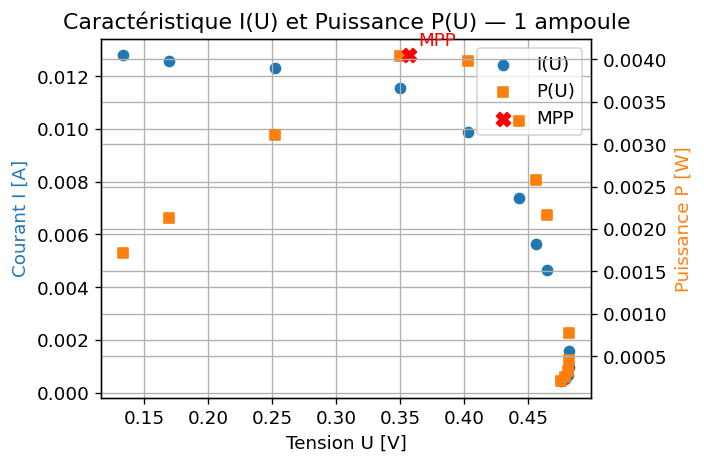

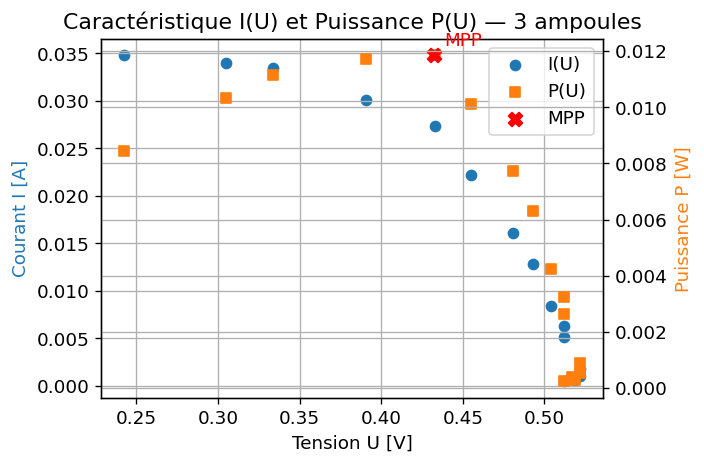

Écart minimal entre U_MPP et un point mesuré : 0.006585292646323182
Écart minimal entre U_MPP et un point mesuré : 0.00048474237118556474
==== Résultats ====
1 ampoule : U_MPP=0.357 V, I_MPP=0.011 A, P_MPP=4.046 mW,  FF=0.668,  η=9.25%
3 ampoules : U_MPP=0.433 V, I_MPP=0.027 A, P_MPP=11.84 mW,  FF=0.613,  η=9.02%


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 11

# ---------- Fonction d'analyse ----------
def analyze_IV(df, Uoc, Isc, nb_ampoules, aire_cm2, irradiance_per_amp):
    df = df.copy()
    df["P_W"] = df["U_V"] * df["I_A"]

    # ---- Passage en np.array pour interpolation ----
    U = df["U_V"].to_numpy()
    I = df["I_A"].to_numpy()

    # On trie par tension croissante (utile pour l'interpolation)
    order = np.argsort(U)
    U_sorted = U[order]
    I_sorted = I[order]

    # ---- Interpolation & recherche du MPP "continu" ----
    # Grille fine de tensions entre U_min et U_max
    U_fine = np.linspace(U_sorted.min(), U_sorted.max(), 2000)

    # Interpolation de I(U)
    I_fine = np.interp(U_fine, U_sorted, I_sorted)

    # Puissance continue : P(U) = U * I(U)
    P_fine = U_fine * I_fine

    # MPP = maximum de P_fine
    idx = np.argmax(P_fine)
    U_mpp = U_fine[idx]
    I_mpp = I_fine[idx]
    P_mpp = P_fine[idx]

    # ---- FF, Pin, rendement ----
    FF = P_mpp / (Uoc * Isc)

    E_Wcm2 = irradiance_per_amp * nb_ampoules / 1000   # mW/cm2 → W/cm2
    Pin = E_Wcm2 * aire_cm2
    eta = P_mpp / Pin

    # On garde P_W mesurée dans le DataFrame
    df["P_W"] = df["U_V"] * df["I_A"]

    return df, U_mpp, I_mpp, P_mpp, FF, Pin, eta




# ---------- Tracé propre ----------
def plot_IV_P(df, U_mpp, I_mpp, P_mpp, label):
    U = df["U_V"]
    I = df["I_A"]
    P = df["P_W"]

    fig, axI = plt.subplots(figsize=(6,4))

    # Courant I(U)
    axI.scatter(U, I, color="#1f77b4", label="I(U)", marker="o")
    axI.set_xlabel("Tension U [V]")
    axI.set_ylabel("Courant I [A]", color="#1f77b4")

    # Axe puissance (à droite)
    axP = axI.twinx()
    axP.scatter(U, P, color="#ff7f0e", label="P(U)", marker="s")
    axP.set_ylabel("Puissance P [W]", color="#ff7f0e")

    # MPP marqué
    axP.scatter([U_mpp], [P_mpp], color="red", marker="X", s=70, label="MPP")
    axP.annotate("MPP", (U_mpp, P_mpp), xytext=(6,6), textcoords="offset points", color="red")

    # Légende combinée
    h1, l1 = axI.get_legend_handles_labels()
    h2, l2 = axP.get_legend_handles_labels()
    axI.legend(h1+h2, l1+l2, loc="best")

    plt.title(f"Caractéristique I(U) et Puissance P(U) — {label}")
    fig.tight_layout()
    plt.show()


# ---------- Données ==========
aire_cm2 = 25
irradiance_par_ampoule_mWcm2 = 1.75

# Série A — 1 ampoule
Uoc_A = 0.483
Isc_A = 0.01254
data_IV_A = pd.DataFrame({
    "R_ohm": [1101, 900.0, 700.0, 500, 300.6, 100.1, 80.5, 60.1, 40.9, 30.5, 20.4, 15.5, 10.5],
    "U_V":   [0.476, 0.479, 0.481, 0.482, 0.482, 0.465, 0.456, 0.443, 0.403, 0.350, 0.2525, 0.1691, 0.1338],
    "I_A":   [429e-6, 530e-6, 684e-6, 958e-6, 1.598e-3, 4.647e-3, 5.656e-3, 7.398e-3, 9.870e-3, 11.557e-3, 12.320e-3, 12.589e-3, 12.792e-3],
})

# Série B — 3 ampoules
Uoc_B = 0.522
Isc_B = 37.04e-3
data_IV_B = pd.DataFrame({
    "R_ohm": [1101, 900.0, 700.0, 500, 300.6, 100.1, 80.5, 60.1, 40.9, 30.5, 20.4, 15.5, 12.9, 9.9, 9.0, 7.0],
    "U_V":   [0.512, 0.519, 0.517, 0.522, 0.522, 0.512, 0.512, 0.504, 0.493, 0.481, 0.455, 0.433,0.3905, 0.3335,0.3047, 0.2425],
    "I_A":   [462e-6, 573e-6, 735e-6, 1.043e-3, 1.730e-3, 5.120e-3, 6.329e-3, 8.396e-3, 12.77e-3, 16.055e-3, 22.216e-3, 27.352e-3,30.043e-3, 33.454e-3,33.930e-3, 34.778e-3],
})


# ---------- Analyse et tracé Série A ----------
dfA, U_mppA, I_mppA, P_mppA, FF_A, Pin_A, eta_A = analyze_IV(
    data_IV_A, Uoc_A, Isc_A, 1, aire_cm2, irradiance_par_ampoule_mWcm2
)
plot_IV_P(dfA, U_mppA, I_mppA, P_mppA, "1 ampoule")


# ---------- Analyse et tracé Série B ----------
dfB, U_mppB, I_mppB, P_mppB, FF_B, Pin_B, eta_B = analyze_IV(
    data_IV_B, Uoc_B, Isc_B, 3, aire_cm2, irradiance_par_ampoule_mWcm2
)
plot_IV_P(dfB, U_mppB, I_mppB, P_mppB, "3 ampoules")


# ---------- Résumé scientifique clair ----------

print("Écart minimal entre U_MPP et un point mesuré :",
      np.min(np.abs(dfA["U_V"].to_numpy() - U_mppA)))

print("Écart minimal entre U_MPP et un point mesuré :",
      np.min(np.abs(dfB["U_V"].to_numpy() - U_mppB)))

print("==== Résultats ====")
print(f"1 ampoule : U_MPP={U_mppA:.3f} V, I_MPP={I_mppA:.3f} A, P_MPP={P_mppA*1000:.3f} mW,  FF={FF_A:.3f},  η={100*eta_A:.2f}%")
print(f"3 ampoules : U_MPP={U_mppB:.3f} V, I_MPP={I_mppB:.3f} A, P_MPP={P_mppB*1000:.2f} mW,  FF={FF_B:.3f},  η={100*eta_B:.2f}%")


## 4) Facteurs d'influence : (a) serie/parallele & ombrage, (b) angle d'incidence

### 4a) Serie / parallele & effets d'ombre
Mesures U_oc et I_sc pour des configurations 1-3 cellules, en parallele puis en serie, avec et sans recouvrement partiel (ombrage) d'une cellule.

### 4b) Angle d'incidence
Pour differents angles theta (en degres), mesures U_oc, I_sc et/ou des points (U,I) sous charge. Le code trace la puissance (par ex. U*I au point choisi, ou I_sc*U_oc comme proxy) en fonction de cos(theta) et fait un ajustement lineaire.

In [41]:
import pandas as pd
import numpy as np

# ====== Reconstruction propre des valeurs mesurées ======

# Série (3 cellules en série)
serie_data = [
    ["3 en série", "Sans diode", "aucun",      0.855,   1.625e-3],
    ["3 en série", "Avec diode", "aucun",      0.867,   1.656e-3],
    ["3 en série", "Avec diode", "1ère couverte", 0.650e-3, 0.422e-3],
    ["3 en série", "Avec diode", "2ème couverte", 0.630e-3, 1.422e-3],
]

df_serie = pd.DataFrame(serie_data, columns=[
    "Configuration", "Diode", "Ombre", "Uoc [V]", "Isc [A]"
])

# Parallèle (1 → 3 cellules)
data_parallele = pd.DataFrame(
    [
        [1, "aucun",                0.3962,   1.775e-3],
        [1, "une_cellule_couverte", 0.0053,   1.0e-6],
        [2, "aucun",                0.2965,   3.670e-3],
        [2, "une_cellule_couverte", 0.2340,   1.790e-3],
        [3, "aucun",                0.2727,   5.527e-3],
        [3, "une_cellule_couverte", 0.2447,   3.625e-3],
    ],
    columns=["nb_cellules","Ombre","Uoc [V]","Isc [A]"]
)
df_par = data_parallele.copy()
df_par["Configuration"] = df_par["nb_cellules"].astype(str) + " en parallele"
df_par["Diode"] = "Sans diode"
df_par = df_par[["Configuration","Diode","Ombre","Uoc [V]","Isc [A]"]]

# ====== Fusion propre ======
df_total = pd.concat([df_serie, df_par], ignore_index=True)

# Ajout de colonnes lisibles (Isc mA)
df_total["Isc [mA]"] = df_total["Isc [A]"] * 1e3

# Affichage final
pd.set_option("display.float_format", "{:.3e}".format)  # format scientifique propre
display(df_total)


,Configuration,Diode,Ombre,Uoc [V],Isc [A],Isc [mA]
0,3 en série,Sans diode,aucun,8.550e-01,1.625e-03,1.625e+00
1,3 en série,Avec diode,aucun,8.670e-01,1.656e-03,1.656e+00
2,3 en série,Avec diode,1ère couverte,6.500e-04,4.220e-04,4.220e-01
3,3 en série,Avec diode,2ème couverte,6.300e-04,1.422e-03,1.422e+00
4,1 en parallele,Sans diode,aucun,3.962e-01,1.775e-03,1.775e+00
5,1 en parallele,Sans diode,une_cellule_couverte,5.300e-03,1.000e-06,1.000e-03
6,2 en parallele,Sans diode,aucun,2.965e-01,3.670e-03,3.670e+00
7,2 en parallele,Sans diode,une_cellule_couverte,2.340e-01,1.790e-03,1.790e+00
8,3 en parallele,Sans diode,aucun,2.727e-01,5.527e-03,5.527e+00
9,3 en parallele,Sans diode,une_cellule_couverte,2.447e-01,3.625e-03,3.625e+00


## Angle d'incidence

Régression linéaire : P ≈ a·cos(θ) + b
a = 4.3045e-01 W
b = 5.0816e-02 W
R² = 0.9917


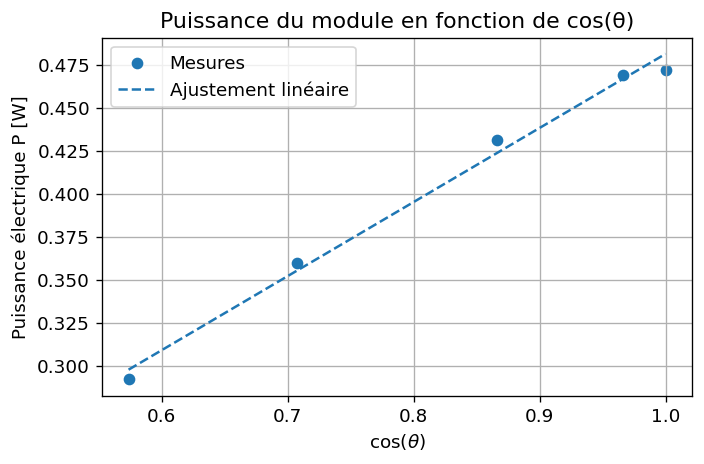

In [42]:


# =============================
# 1) Données EXPÉRIMENTALES
# =============================
# Remplace les ... par tes valeurs mesurées

# Angles d'incidence (en degrés) par rapport à la normale

# distance 450cm


angles_deg = np.array([
    0, 15, 30, 45, 55 # EXEMPLE : à remplacer
])

# Tension à vide Uoc (en Volts)
Uoc = np.array([
    4.898, 4.893, 4.868, 4.820, 4.749  # EXEMPLE
])

# Courant de court-circuit Isc (en Ampères)
Isc = np.array([
    96.4e-3, 95.9e-3, 88.6e-3, 74.6e-3, 61.5e-3  # EXEMPLE
])

# Si tu as directement mesuré la puissance au point de fonctionnement (Pmax),
# tu peux commenter la ligne P = Uoc * Isc et décommenter celle-ci :
# P = np.array([...])  # puissance mesurée en W


# =============================
# 2) Calcul du cos(θ) et P
# =============================

# Conversion en radians
angles_rad = np.deg2rad(angles_deg)

# cosinus de l'angle incident
cos_theta = np.cos(angles_rad)

# Estimation de la puissance électrique
# Ici on prend P ≈ Uoc * Isc comme approximation
P = Uoc * Isc

# =============================
# 3) Régression linéaire P = a·cos(θ) + b
# =============================

# On trie les points suivant cos(θ) pour avoir une jolie courbe
indices_trie = np.argsort(cos_theta)
cos_theta_sorted = cos_theta[indices_trie]
P_sorted = P[indices_trie]

# Ajustement linéaire
coeffs = np.polyfit(cos_theta_sorted, P_sorted, 1)
a, b = coeffs  # P = a * cos(theta) + b
P_fit = np.polyval(coeffs, cos_theta_sorted)

# R^2

SS_res = np.sum((P_sorted - P_fit)**2)
SS_tot = np.sum((P_sorted - np.mean(P_sorted))**2)
R2 = 1 - (SS_res / SS_tot)



print(f"Régression linéaire : P ≈ a·cos(θ) + b")
print(f"a = {a:.4e} W")
print(f"b = {b:.4e} W")
print(f"R² = {R2:.4f}")

# =============================
# 4) Tracé du diagramme
# =============================

plt.figure(figsize=(6,4))
plt.scatter(cos_theta, P, label="Mesures", marker="o")
plt.plot(cos_theta_sorted, P_fit, label="Ajustement linéaire", linewidth=1.5, linestyle="--")

plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Puissance électrique P [W]")
plt.title("Puissance du module en fonction de cos(θ)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## meme que 2.1.3 mais à 55deg

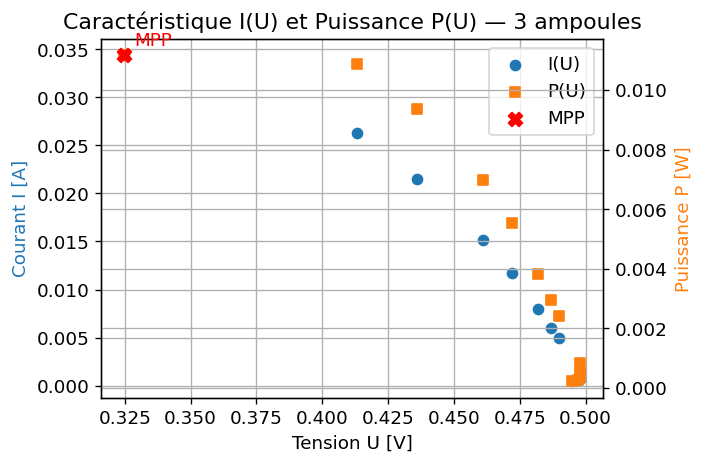

==== Résultats ====
3 ampoules : U_MPP=0.325 V, I_MPP=0.034 A, P_MPP=11.16 mW,  FF=0.603,  η=8.50%


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 11

# ---------- Fonction d'analyse ----------
def analyze_IV(df, Uoc, Isc, nb_ampoules, aire_cm2, irradiance_per_amp):
    df = df.copy()
    df["P_W"] = df["U_V"] * df["I_A"]

    # MPP
    idx = df["P_W"].idxmax()
    U_mpp = df.loc[idx, "U_V"]
    I_mpp = df.loc[idx, "I_A"]
    P_mpp = df.loc[idx, "P_W"]

    FF = P_mpp / (Uoc * Isc)

    E_Wcm2 = irradiance_per_amp * nb_ampoules / 1000   # mW/cm2 → W/cm2
    Pin = E_Wcm2 * aire_cm2
    eta = P_mpp / Pin

    return df, U_mpp, I_mpp, P_mpp, FF, Pin, eta


# ---------- Tracé propre ----------
def plot_IV_P(df, U_mpp, I_mpp, P_mpp, label):
    U = df["U_V"]
    I = df["I_A"]
    P = df["P_W"]

    fig, axI = plt.subplots(figsize=(6,4))

    # Courant I(U)
    axI.scatter(U, I, color="#1f77b4", label="I(U)", marker="o")
    axI.set_xlabel("Tension U [V]")
    axI.set_ylabel("Courant I [A]", color="#1f77b4")

    # Axe puissance (à droite)
    axP = axI.twinx()
    axP.scatter(U, P, color="#ff7f0e", label="P(U)", marker="s")
    axP.set_ylabel("Puissance P [W]", color="#ff7f0e")

    # MPP marqué
    axP.scatter([U_mpp], [P_mpp], color="red", marker="X", s=70, label="MPP")
    axP.annotate("MPP", (U_mpp, P_mpp), xytext=(6,6), textcoords="offset points", color="red")

    # Légende combinée
    h1, l1 = axI.get_legend_handles_labels()
    h2, l2 = axP.get_legend_handles_labels()
    axI.legend(h1+h2, l1+l2, loc="best")

    plt.title(f"Caractéristique I(U) et Puissance P(U) — {label}")
    fig.tight_layout()
    plt.show()


# ---------- Données ==========
#53deg

aire_cm2 = 25
irradiance_par_ampoule_mWcm2 = 1.75

# Série B — 3 ampoules
Uoc_B = 0.4961
Isc_B = 37.294e-3
data_IV_B = pd.DataFrame({
    "R_ohm": [1101, 902.0, 700.0, 500, 301.0, 100.2, 80.9, 60.8,40.5, 30.5, 20.5, 15.6, 9.6],
    "U_V":   [0.495, 0.497, 0.498, 0.498, 0.498, 0.490, 0.487, 0.482,0.472,0.461, 0.436, 0.413, 0.3247],
    "I_A":   [449e-6, 550e-6, 710e-6, 996e-6, 1.670e-3, 4.926e-3, 6.042e-3, 7.965e-3, 11.711e-3, 15.127e-3, 21.464e-3, 26.331e-3, 34.360e-3],
})

# ---------- Analyse et tracé Série B ----------
dfB, U_mppB, I_mppB, P_mppB, FF_B, Pin_B, eta_B = analyze_IV(
    data_IV_B, Uoc_B, Isc_B, 3, aire_cm2, irradiance_par_ampoule_mWcm2
)
plot_IV_P(dfB, U_mppB, I_mppB, P_mppB, "3 ampoules")


# ---------- Résumé scientifique clair ----------
print("==== Résultats ====")
print(f"3 ampoules : U_MPP={U_mppB:.3f} V, I_MPP={I_mppB:.3f} A, P_MPP={P_mppB*1000:.2f} mW,  FF={FF_B:.3f},  η={100*eta_B:.2f}%")


## 5) Dimensionnement d'une petite installation (24 V DC)

Scenario: alimenter une TV (14 W) et un frigo (44 W) en 24 V DC par temps clair. Utiliser U_MPP et eta mesures en section 3.

Entrees: P_load, irradiance E (par defaut 1000 W/m^2), eta, U_MPP, marges (ombrage ponctuel, pertes).

Le code dimensionne l'aire PV et une combinaison simple de cellules/modules (serie/parallele) pour atteindre 24 V au MPP.

In [44]:

# ---- Entrees principales ----
P_TV_W = 14.0
P_frigo_W = 44.0
P_load_W = P_TV_W + P_frigo_W

# Irradiance (W/m^2)
E_Wm2 = 1000.0

# Resultats (section 3, a reprendre apres calcul reel)
eta = 0.0902        # rendement mesure (0..1)
U_mpp_V = 0.433    # tension au MPP pour un module
I_mpp_A = 0.027    # courant au MPP pour un module
P_mpp_W = 0.01184    # puissance au MPP d'un module

# Marges
margin_losses = 0.15     # 15% pertes diverses
margin_shade = 0.10      # 10% ombrage ponctuel

# ---- Calculs ----
P_needed_W = P_load_W * (1 + margin_losses + margin_shade)

# Aire PV requise (si eta au niveau module et E irradiance plane)
# P = eta * E * A  =>  A = P / (eta * E)
A_required_m2 = P_needed_W / (eta * E_Wm2) if (eta and not np.isnan(eta)) else np.nan

# Nombre de modules en serie pour 24 V au MPP
N_series = int(np.ceil(24.0 / U_mpp_V)) if (U_mpp_V and not np.isnan(U_mpp_V)) else np.nan

# Puissance d'une branche en serie (approx: N_series * P_mpp)
P_branch_W = N_series * P_mpp_W if (not np.isnan(N_series) and P_mpp_W and not np.isnan(P_mpp_W)) else np.nan

# Nombre de branches en parallele
N_parallel = int(np.ceil(P_needed_W / P_branch_W)) if (P_branch_W and not np.isnan(P_branch_W)) else np.nan

# Puissance totale nominale au MPP
P_total_W = N_series * N_parallel * P_mpp_W if (not np.isnan(N_series) and not np.isnan(N_parallel) and P_mpp_W) else np.nan

# ---- Resume ----
print("=== Dimensionnement PV (brouillon base sur mesures) ===")
print(f"Charge: TV {P_TV_W:.1f} W + frigo {P_frigo_W:.1f} W -> P_load = {P_load_W:.1f} W")
print(f"Marges: pertes {margin_losses*100:.0f} %, ombrage {margin_shade*100:.0f} % -> P_needed = {P_needed_W:.1f} W")
print(f"Irradiance E = {E_Wm2:.0f} W/m^2, rendement eta = {eta}")
print(f"Aire PV requise ~ {A_required_m2:.3f} m^2")
print(f"U_mpp (module) ~ {U_mpp_V} V  -> N_series ~ {N_series}")
print(f"P_mpp (module) ~ {P_mpp_W} W  -> N_parallel ~ {N_parallel}")
print(f"Puissance totale nominale ~ {P_total_W} W")
print("\nRemarques:")
print("- Ajuster les marges selon la realite (temperature elevee -> U_mpp baisse, eta diminue).")
print("- Prevoir des diodes bypass pour limiter l'effet d'un ombrage local en serie.")
print("- Si panneaux commerciaux, remplacer U_mpp/P_mpp par les spec STC.")


=== Dimensionnement PV (brouillon base sur mesures) ===
Charge: TV 14.0 W + frigo 44.0 W -> P_load = 58.0 W
Marges: pertes 15 %, ombrage 10 % -> P_needed = 72.5 W
Irradiance E = 1000 W/m^2, rendement eta = 0.0902
Aire PV requise ~ 0.804 m^2
U_mpp (module) ~ 0.433 V  -> N_series ~ 56
P_mpp (module) ~ 0.01184 W  -> N_parallel ~ 110
Puissance totale nominale ~ 72.9344 W

Remarques:
- Ajuster les marges selon la realite (temperature elevee -> U_mpp baisse, eta diminue).
- Prevoir des diodes bypass pour limiter l'effet d'un ombrage local en serie.
- Si panneaux commerciaux, remplacer U_mpp/P_mpp par les spec STC.
